In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from IPython.display import display
os.chdir(r'/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter')
from MHS.F_model_training import *


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/home/fruitspec-lab/anaconda3/envs/FsCounterGPUtest/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df_cv_org = pd.read_csv("/media/fruitspec-lab/cam175/customers_new/features_1308_new_translator.csv")

In [3]:
or2009_cv_features = "/media/fruitspec-lab/cam175/customers_new/MOTCHA/OR2009/cv_features.csv"
BEERAMU0_cv_features = "/media/fruitspec-lab/cam175/customers_new/MOTCHA/BEERAMU0/cv_features.csv"
ORSHICHT_cv_features = "/media/fruitspec-lab/cam175/customers_new/MOTCHA/ORSCHIST/cv_features.csv"
cv_features_paths = [or2009_cv_features, BEERAMU0_cv_features, ORSHICHT_cv_features]
mothca_exp_cv = pd.concat([pd.read_csv(p) for p in cv_features_paths])
df_cv_org = pd.concat([df_cv_org,mothca_exp_cv]).reset_index(drop = True)
df_cv_org

,Unnamed: 0,total_foliage,total_orange,width,height,volume,surface_area,perimeter,avg_width,avg_height,...,cv,cv1,cv2,cv3,cv4,cv5,block_name,name,customer,cont
0,0,121.197176,2.193163,2.698580,3.662066,6.981767,6.716055,5.278098,2.293109,2.742305,...,283.0,283,218,188,173,156,DWDBCL46,R203_S1_T1,DEWAGD,NaN
1,1,141.728919,1.861267,2.621310,3.149426,5.665482,3.675360,2.589877,2.300400,2.837043,...,248.0,248,183,156,146,136,DWDBCL46,R203_S2_T1,DEWAGD,NaN
2,2,161.993857,1.517138,2.659224,3.708786,6.866103,3.984093,2.936604,2.288443,3.314990,...,158.0,158,119,105,96,85,DWDBCL46,R21_S1_T1,DEWAGD,NaN
3,3,153.789183,1.884458,2.683011,3.416385,6.438434,3.458153,3.079964,2.343283,3.005899,...,173.0,173,141,131,115,105,DWDBCL46,R21_S2_T1,DEWAGD,NaN
4,4,156.639359,2.846400,2.849478,3.760399,7.993428,4.199263,3.035079,2.710563,2.808083,...,290.0,290,214,194,179,160,DWDBCL46,R23_S1_T1,DEWAGD,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,325,152,103,75,53,ORSCHIST,R6_S1_T6,MOTCHA,NaN
1254,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,334,179,118,86,62,ORSCHIST,R6_S1_T7,MOTCHA,NaN
1255,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,162,83,64,58,45,ORSCHIST,R6_S1_T8,MOTCHA,NaN
1256,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,213,145,121,107,94,ORSCHIST,R6_S1_T9,MOTCHA,NaN


# unrelated- testing for new feature: cv decay rate

In [4]:
cfg = OmegaConf.load("/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter/MHS/model_config.yaml")
f_df = read_f_df(cfg)
df_cv_w_f = add_fs(df_cv_org, f_df).reset_index(drop = True)
plot_fruit_var = get_plot_fruit_variety_df(cfg)
plot_fruit_var = pd.concat([plot_fruit_var, pd.DataFrame({"block_name" : ["OR2009", "BEERAMU0", "ORSCHIST"],
                                         "fruit_type":["Mandarin"]*3})]).reset_index(drop=True)
df_cv_w_f = pd.merge(df_cv_w_f, plot_fruit_var.drop_duplicates(), how="left", on="block_name")

In [5]:
# for i in range(2,6):
#     df_cv_w_f[f"cv{i}/cv1"] = df_cv_w_f[f"cv{i}"]/df_cv_w_f["cv1"]
# cv_ratio_cols = ["cv2/cv1", "cv3/cv1", "cv4/cv1", "cv5/cv1"]
# df_cv_w_f["% hidden"] = (df_cv_w_f["F"] - df_cv_w_f["cv1"])/ df_cv_w_f["F"]
# sub_df = df_cv_w_f[cv_ratio_cols + ["% hidden", "fruit_type"]]
# plt.plot([1,2,3,4], sub_df.iloc[46, :-2])
# plt.show()

# from scipy.optimize import curve_fit
# def func(x, beta, alpha):
#     return alpha*x ** beta
# def curve_fit_beta(x, y):
#     if np.any(np.isnan(y)):
#         return 0
#     return curve_fit(func, x, y)[0][0]

# sub_df["decay_rate"] = sub_df.apply(lambda x: curve_fit_beta([1,2,3,4], [x["cv2/cv1"], x["cv3/cv1"], x["cv4/cv1"], x["cv5/cv1"]]), axis = 1)
# sns.scatterplot(x="decay_rate", y="% hidden", data = sub_df, hue = "fruit_type")


In [6]:
# for index in list(sub_df.sort_values("% hidden").index)[::50]:
#     plt.plot([1,2,3,4], sub_df.iloc[index, :-3])
#     plt.title(f"{index}: % hidden = {sub_df.iloc[index, -3]}")
#     plt.show()

In [7]:
# for i in range(2,6):
#     df_cv_w_f[f"cv{i}/cv1"] = df_cv_w_f[f"cv{i}"]/df_cv_w_f["cv1"]
# cv_ratio_cols = ["cv2/cv1", "cv3/cv1", "cv4/cv1", "cv5/cv1"]
# cv_ratio_cols = ["cv1","cv2", "cv3", "cv4", "cv5"]
# df_cv_w_f["% hidden"] = df_cv_w_f["cv1"]/ df_cv_w_f["F"]
# sub_df = df_cv_w_f[cv_ratio_cols + ["% hidden", "fruit_type"]]
# plt.plot([1,2,3,4,5], sub_df.iloc[46, :-2])
# plt.show()

# from scipy.optimize import curve_fit
# def func(x, beta, alpha):
#     return alpha*x ** beta
# def curve_fit_beta(x, y):
#     if np.any(np.isnan(y)):
#         return 0
#     return curve_fit(func, x, y)[0][0]

# sub_df["decay_rate"] = sub_df.apply(lambda x: curve_fit_beta([1,2,3,4,5], [x["cv1"], x["cv2"], x["cv3"], x["cv4"], x["cv5"]]), axis = 1)
# sns.scatterplot(x="decay_rate", y="% hidden", data = sub_df, hue = "fruit_type")
# plt.show()

# for index in list(sub_df.sort_values("% hidden").index)[::50]:
#     plt.plot([1,2,3,4,5], sub_df.iloc[index, :-3])
#     plt.title(f"{index}: % hidden = {sub_df.iloc[index, -3]}")
#     plt.show()

## filter

In [8]:
df_cv = df_cv_org[df_cv_org["customer"].isin(["DEWAGD", "PROPAL", "MOTCHA"])] #, "FOWLER", "MOTCHA"
df_cv = df_cv[df_cv["name"].str.endswith("1") | df_cv["customer"].isin(["FOWLER", "MOTCHA"])]
df_cv["block_name"] = df_cv["block_name"].replace({"2020injx": "2020injX", "injertos": "Injertos"})

## Add Fs

In [9]:
cfg = OmegaConf.load("/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter/MHS/model_config.yaml")
cfg.drop_customer: ["MOTCHADS"]
f_df = read_f_df(cfg)

### handling motcha and fowler

In [10]:
f_df_serinal = f_df[~f_df["tree_serial"].isna()]
base_tree_name = f_df_serinal["block_name"] + "_" + "R0_T" + f_df_serinal["tree_serial"].astype(int).astype(str)
tree_new_name = base_tree_name + "_S" + f_df_serinal["side"].replace({"A":1, "B":2}).astype(int).astype(str)
tree_new_name = tree_new_name.apply(lambda x: f'{x.split("_")[1]}_{x.split("_")[3]}_{x.split("_")[2]}')
f_df_serinal["base_tree_name"] = base_tree_name
f_df_serinal["tree_new_name"] = tree_new_name
# f_df.loc[~f_df["tree_serial"].isna(), "new_tree_name"] = f_df_serinal["tree_new_name"]


### adding

In [11]:
df_f = add_fs(df_cv, f_df)

In [12]:
plot_fruit_var = get_plot_fruit_variety_df(cfg)
plot_fruit_var = pd.concat([plot_fruit_var, pd.DataFrame({"block_name" : ["OR2009", "BEERAMU0", "ORSCHIST"],
                                         "fruit_type":["orange"]*3})]).reset_index(drop=True)
df_f = pd.merge(df_f, plot_fruit_var.drop_duplicates(), how="left", on="block_name")
hidden_range, cv_range, F_range, fruits_exclude = get_ranges(cfg)
df_f = process_fruit_type(df_f, fruits_exclude, cfg)

In [13]:
df_f["full_name"] = df_f["customer"] + df_f["block_name"] + df_f["name"]

In [14]:
f_df_serinal["full_name"] = f_df_serinal["customer_name"] + f_df_serinal["block_name"] + f_df_serinal["new_tree_name"]
df_f.loc[df_f["customer"].isin(["FOWLER", "MOTCHA"]), "name"] = df_f[df_f["customer"].isin(["FOWLER", "MOTCHA"])]["full_name"].map(dict(zip(f_df_serinal["full_name"], f_df_serinal["tree_new_name"])))



## Rename trees

In [15]:
cv_cols = ["cv1", "cv2", "cv3", "cv4" ,"cv5"]

In [16]:
df_f["base_tree_name"] = df_f["block_name"] + "_"  + df_f["name"].apply(lambda x: x.split("_")[0] + "_" + x.split("_")[-1])
counts = df_f["base_tree_name"].value_counts()>1
df_f = df_f[df_f["base_tree_name"].map(dict(zip(counts.index, counts.values)))]

In [17]:
df_f["side"] = df_f["name"].str.contains("S1")*1 +1

In [18]:
grouped_trees = df_f.groupby("base_tree_name")[cv_cols + ["F", "lemon", "mandarin"]].mean()
grouped_trees[cv_cols] = grouped_trees[cv_cols]*2
grouped_trees["base_tree_name"] = list(grouped_trees.index)
grouped_trees["block_name"] = grouped_trees["base_tree_name"].apply(lambda x: x.split("_")[0])


In [19]:
## checking for difference between sides

In [20]:
from scipy.stats import ttest_1samp
df_f_org = df_f.reset_index(drop=True)
cv_cols = [f"cv{i}" for i in range(1,6)]
cv_F_cols = [f"{col}/F" for col in cv_cols]
for cv_col, cv_F_col in zip(cv_cols, cv_F_cols):
    df_f_org[cv_F_col] = df_f_org[cv_col]/df_f_org["F"]
df_f_grp_by = df_f_org.groupby(["block_name", "side"])[cv_F_cols].mean()
df_f_grp_by.reset_index(inplace=True)
res = pd.DataFrame()
pv = []
stat = []
for cv in range(1,6):
    df_pivot = df_f_grp_by.pivot_table(index='block_name', columns='side', values=f'cv{cv}/F')
    abs_diff = np.abs(df_pivot[2]-df_pivot[1])
    ttest_res = ttest_1samp(abs_diff, 0)
    pv.append(ttest_res[1])
    stat.append(ttest_res[0])
    res[f'cv{cv}/F'] = abs_diff

display(res)
display(pd.concat([pd.DataFrame(res.mean()), pd.DataFrame(res.std())], axis = 1))
pd.DataFrame({"t-statistic": stat, "pvalue": pv}, index = cv_F_cols)

,cv1/F,cv2/F,cv3/F,cv4/F,cv5/F
block_name,,,,,
2004XXXX,0.153782,0.161697,0.145129,0.147247,0.146150
2005XXXX,0.033466,0.001323,0.021906,0.031071,0.033328
2018NINA,0.021445,0.042776,0.059832,0.080112,0.068156
2018XXXX,0.003458,0.077473,0.117048,0.120462,0.126656
94000000,0.360614,0.352563,0.361741,0.346724,0.313329
BEERAMU0,0.060254,0.040914,0.020543,0.014329,0.005965
DWDBCL46,0.007771,0.012215,0.021770,0.021293,0.016109
DWDBCN51,0.071444,0.051496,0.042979,0.049579,0.045480
DWDBLE33,0.003286,0.010400,0.010461,0.019362,0.022752


,0,0
cv1/F,0.125852,0.145122
cv2/F,0.084477,0.079562
cv3/F,0.077954,0.071719
cv4/F,0.074927,0.064743
cv5/F,0.069866,0.059663


,t-statistic,pvalue
cv1/F,4.828430,3.780452e-05
cv2/F,5.911680,1.785136e-06
cv3/F,6.051793,1.206459e-06
cv4/F,6.443584,4.063849e-07
cv5/F,6.519908,3.292376e-07


In [21]:
df_f_org[df_f_org["side"] == 1][cv_F_cols].mean().round(2)

cv1/F    0.66
cv2/F    0.43
cv3/F    0.34
cv4/F    0.29
cv5/F    0.26
dtype: float64

In [22]:
df_f_org[df_f_org["side"] == 2][cv_F_cols].mean().round(2)

cv1/F    0.66
cv2/F    0.41
cv3/F    0.32
cv4/F    0.27
cv5/F    0.24
dtype: float64

# F_modeling

### Load data

In [23]:
df_f_org = grouped_trees.reset_index(drop=True)

In [24]:
df_f_org = df_f[df_f["side"]==2].reset_index(drop=True)

In [25]:
cv_cols = [f"cv{i}" for i in range(1,6)]
cv_F_cols = [f"{col}/F" for col in cv_cols]
for cv_col, cv_F_col in zip(cv_cols, cv_F_cols):
    df_f_org[cv_F_col] = df_f_org[cv_col]/df_f_org["F"]

In [26]:
# df_f_org.to_csv(f"{df_f_path.split('.')[0]}_cvf.csv")

### Short EDA

In [27]:
df_f_org[cv_F_cols].mean().round(2)

cv1/F    0.66
cv2/F    0.41
cv3/F    0.32
cv4/F    0.27
cv5/F    0.24
dtype: float64

In [28]:
pd.concat([df_f_org.groupby(["block_name"])[cv_F_cols].mean(), df_f_org.groupby(["block_name"])["cv1"].count()], axis = 1).round(2)


,cv1/F,cv2/F,cv3/F,cv4/F,cv5/F,cv1
block_name,,,,,,
2004XXXX,0.44,0.27,0.22,0.19,0.16,5
2005XXXX,0.76,0.50,0.41,0.34,0.29,6
2018NINA,0.89,0.57,0.47,0.40,0.36,5
2018XXXX,0.87,0.58,0.44,0.38,0.34,8
94000000,0.67,0.42,0.33,0.28,0.25,6
BEERAMU0,0.66,0.35,0.25,0.19,0.15,40
DWDBCL46,0.40,0.30,0.26,0.23,0.20,8
DWDBCN51,0.56,0.38,0.32,0.27,0.24,5
DWDBLE33,0.57,0.43,0.37,0.33,0.30,3


In [29]:
df_f_org.groupby(["block_name"])["cv1", "cv2"].count()

,cv1,cv2
block_name,,
2004XXXX,5,5
2005XXXX,6,6
2018NINA,5,5
2018XXXX,8,8
94000000,6,6
BEERAMU0,40,40
DWDBCL46,8,8
DWDBCN51,5,5
DWDBLE33,3,3


### CV-F graphs

<Figure size 1000x600 with 0 Axes>

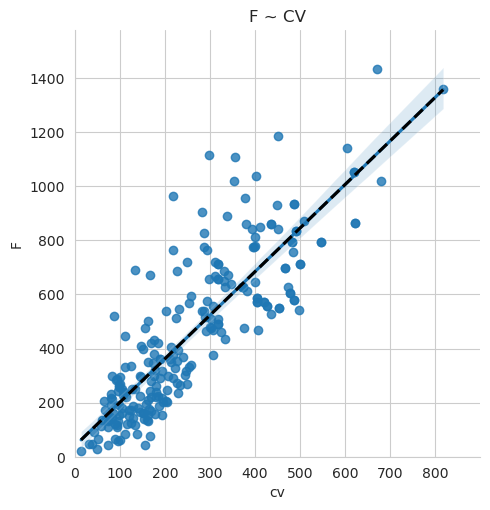

In [30]:

df = df_f_org.copy()
col = 'cv1'
max_val = np.min(np.max(df[[col, "F"]].values, axis=0))

plt.figure(figsize=(10, 6))  # Adjust figure size

# Enable grid lines
sns.set_style("whitegrid")

ax = sns.lmplot(data=df, x=col, y="F", palette="Blues")  # Customize color palette
sns.regplot(data=df, x=col, y="F", scatter_kws={'s': 5}, order=1, ci=0, ax=ax.axes[0, 0],
            x_ci=0, color="black", line_kws={"ls": "--"},scatter=False)  # Adjust scatter marker size and line style

plt.xlim(0, np.max(df[col] * 1.1))  # Adjust x-axis limits
plt.ylim(0, np.max(df["F"] * 1.1))  # Adjust y-axis limits

plt.xlabel("cv")  # Set x-axis label
plt.ylabel("F")  # Set y-axis label
plt.title("F ~ CV")  # Set plot title

plt.show()

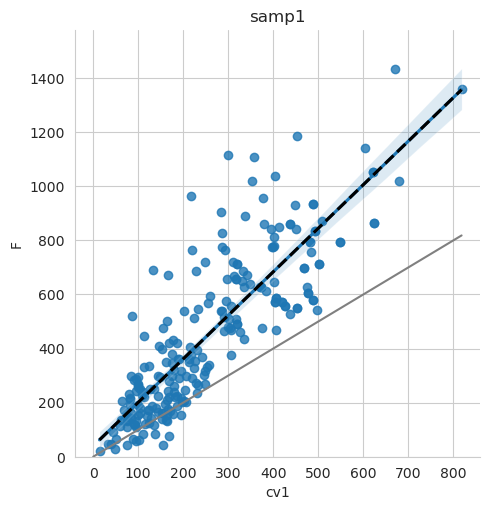

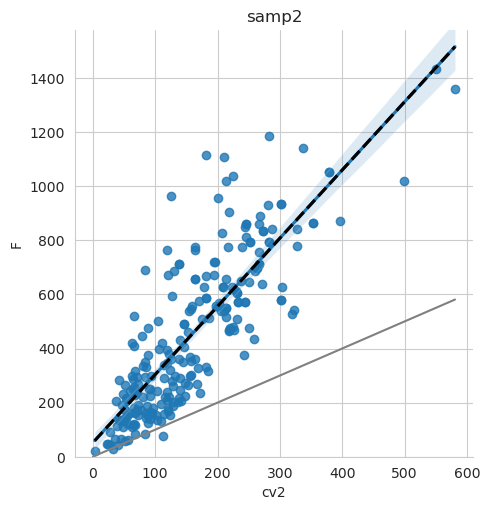

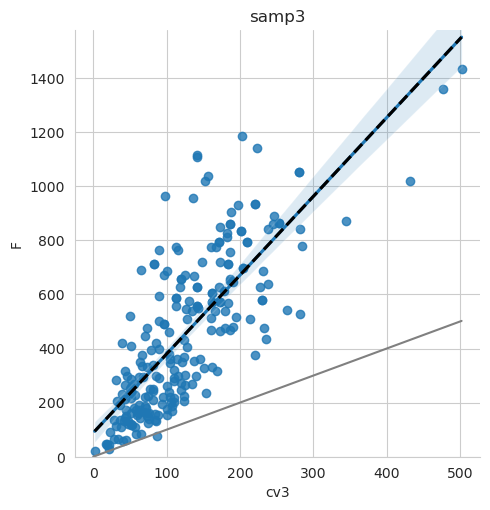

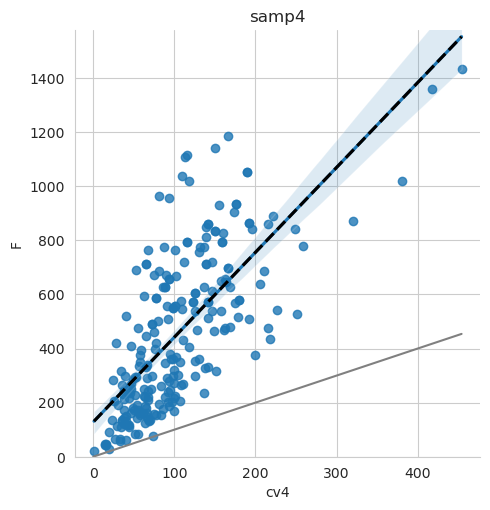

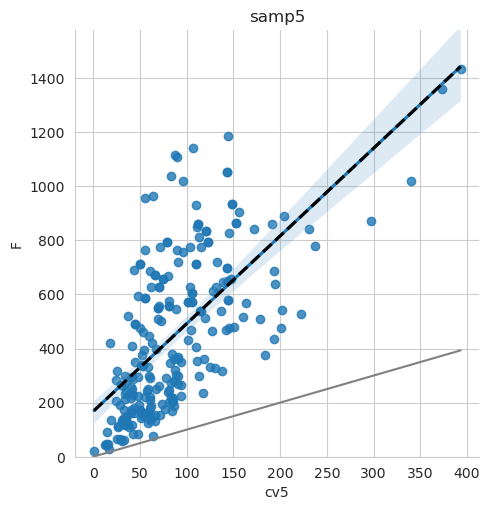

In [31]:
def plot_F_cv(df,min_samp = "", hue = None, title= "", col = ""):
    if col == "":
        col = f"cv{min_samp}"
    max_val = np.min(np.max(df[[col, "F"]].values, axis = 0))
    ax = sns.lmplot(data = df, x = col, y="F", hue = hue)
    sns.regplot(data = df, x = col, y="F", scatter_kws={'s':2}, order = 1,ci=0, ax=ax.axes[0,0],
               x_ci = 0, color = "black", line_kws={"ls":"--"},scatter=False)
    plt.plot([0, max_val], [0, max_val], color='grey')
    plt.ylim(0, np.max(df["F"]*1.1))
    plt.title(title)
    plt.show()

for i in range(1,6)    :
    plot_F_cv(df_f_org,i, title = f"samp{i}")
    

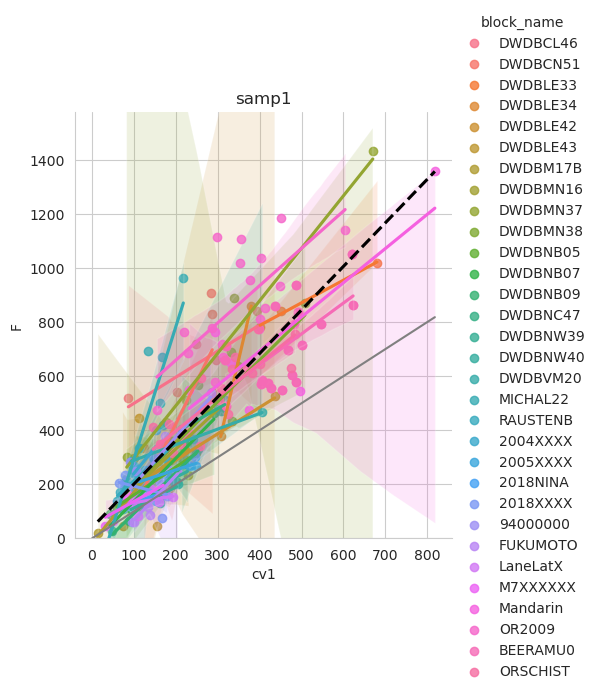

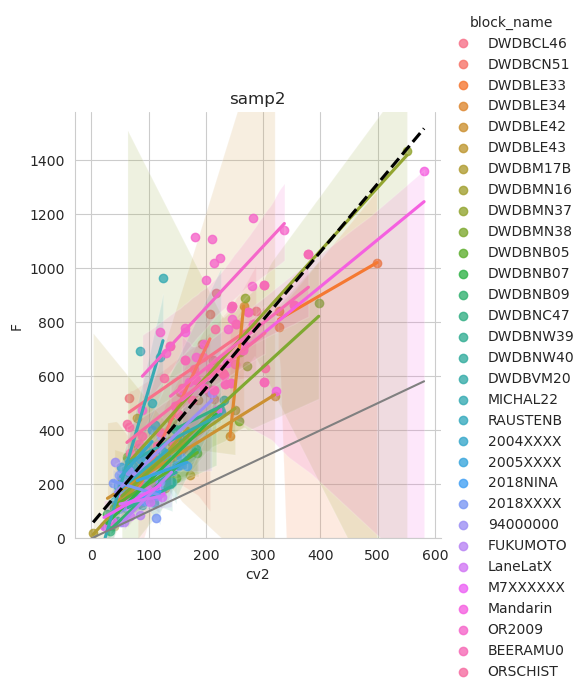

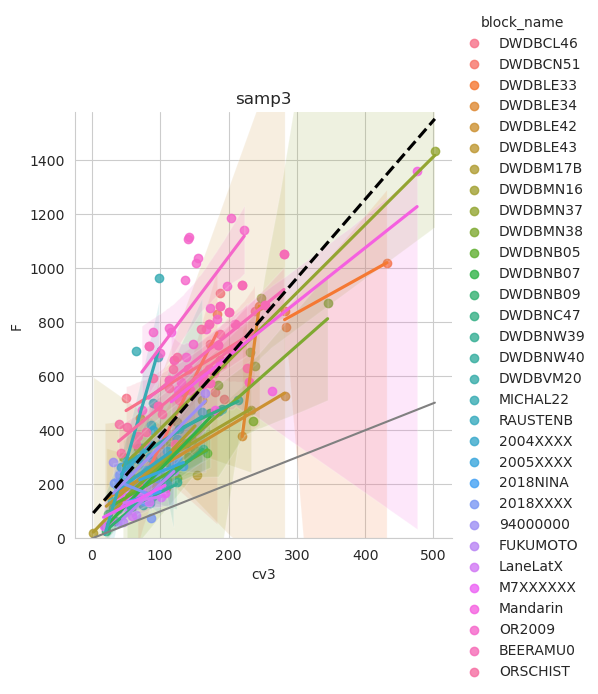

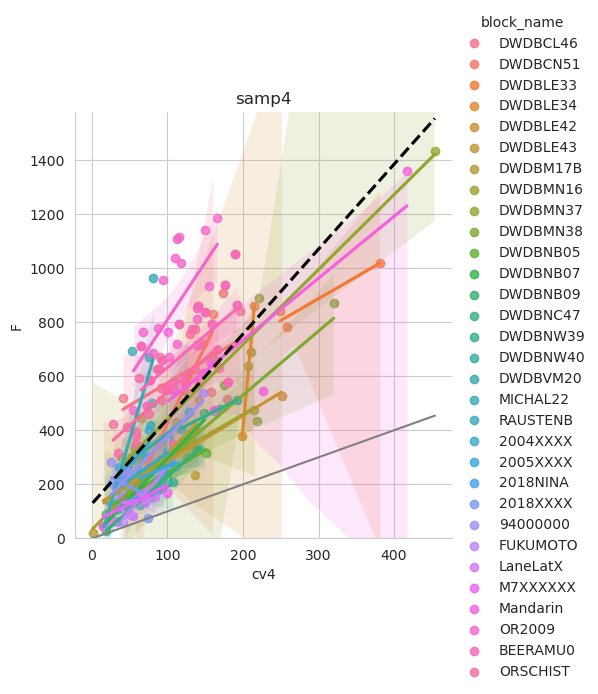

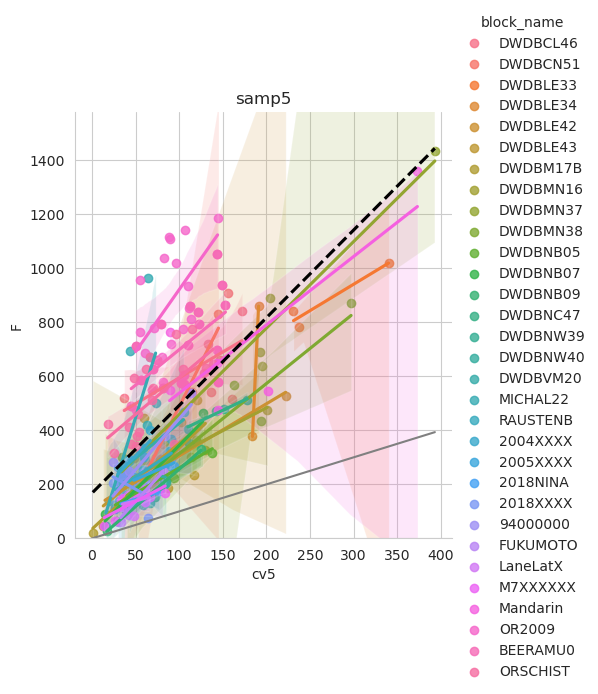

In [32]:
for i in range(1,6):
    plot_F_cv(df_f_org,i,"block_name", f"samp{i}")

### Modeling

In [33]:
import sys
sys.path.append(r'/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter')

from MHS.scoring import cross_validate_with_mean
from sklearn.linear_model import LinearRegression, PoissonRegressor

class MaxLinearRegressor(LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None):
        super().__init__(fit_intercept=fit_intercept, normalize=normalize, copy_X=copy_X, n_jobs=n_jobs)
    
    def predict(self, X):
        predicted_values = super().predict(X)
        return np.array([max(p, 0) for p in predicted_values])

In [34]:
def get_model_res(df, cv=1, include_fruits = True, include_interaction=True, group_col = "block_name"):
    groups = df[group_col]
    if include_fruits:
        X = df[[f"cv{cv}", "lemon", "mandarin"]]
        if include_interaction:
            X["cv_lemon"] = X["lemon"] * X[f"cv{cv}"]
            X["cv_mandarin"] = X["mandarin"] * X[f"cv{cv}"]
    else:
        X = df[[f"cv{cv}"]]
    y = df["F"]
    model = LinearRegression(fit_intercept = False)
    gr_res, ge_std, tree_res, tree_std, preds = cross_validate_with_mean(model, X, y, groups=groups, ret_all_res=True)
    return gr_res, ge_std, tree_res, tree_std, preds

In [35]:
results_list = []
include_fruits = True
include_interaction=True
for include_fruits in [True, False]:
    for include_interaction in [True, False]:
        for cv in range(1,6):
            # 2 sided
            df = grouped_trees.reset_index(drop=True).copy()
            gr_res, ge_std, tree_res, tree_std, preds = get_model_res(df, cv, include_fruits, include_interaction)
            res = {"model": "2_sided", "cv": cv,
                   "LBOCV": gr_res, "LBOCV_std": ge_std, "tree_mape": tree_res, "tree_std": tree_std,
                  "include_fruits": include_fruits, "include_interaction": include_interaction}
            results_list.append(res)
            # 1 side 2 trees
            df = df_f.reset_index(drop=True).copy()
            gr_res, ge_std, tree_res, tree_std, preds = get_model_res(df, cv, include_fruits, include_interaction)
            res = {"model": "1_sided", "cv": cv,
                   "LBOCV": gr_res, "LBOCV_std": ge_std, "tree_mape": tree_res, "tree_std": tree_std,
                  "include_fruits": include_fruits, "include_interaction": include_interaction}
            results_list.append(res)
            
            #side A only
            df = df_f[df_f["side"] == 1].reset_index(drop=True).copy()
            gr_res, ge_std, tree_res, tree_std, preds = get_model_res(df, cv, include_fruits, include_interaction)
            res = {"model": "A", "cv": cv,
                   "LBOCV": gr_res, "LBOCV_std": ge_std, "tree_mape": tree_res, "tree_std": tree_std,
                  "include_fruits": include_fruits, "include_interaction": include_interaction}
            results_list.append(res)
            
            #side B only
            df = df_f[df_f["side"] == 2].reset_index(drop=True).copy()
            gr_res, ge_std, tree_res, tree_std, preds = get_model_res(df, cv, include_fruits, include_interaction)
            res = {"model": "B", "cv": cv,
                   "LBOCV": gr_res, "LBOCV_std": ge_std, "tree_mape": tree_res, "tree_std": tree_std,
                  "include_fruits": include_fruits, "include_interaction": include_interaction}
            results_list.append(res)
summary_res = pd.DataFrame(results_list)   
summary_res

true: 10424.0,    pred: 10721.440330918686. (2.85 %) (ORSCHIST)
true: 14054.0,    pred: 18459.705687374553. (31.35 %) (BEERAMU0)
true: 15596.0,    pred: 9285.444909355992. (40.46 %) (OR2009)
true: 3105.0,    pred: 2831.0801995578913. (8.82 %) (RAUSTENB)
true: 4166.0,    pred: 3721.2121889993273. (10.68 %) (MICHAL22)
true: 1443.0,    pred: 1966.3682742960998. (36.27 %) (2018XXXX)
true: 5240.0,    pred: 3828.575922743045. (26.94 %) (DWDBCL46)
true: 4340.0,    pred: 4320.003709935757. (0.46 %) (Mandarin)
true: 732.0,    pred: 802.9364161401988. (9.69 %) (M7XXXXXX)
true: 845.0,    pred: 1191.782902922353. (41.04 %) (LaneLatX)
true: 1503.0,    pred: 2036.2956640932698. (35.48 %) (2005XXXX)
true: 1770.0,    pred: 1826.8173915028772. (3.21 %) (94000000)
true: 1379.0,    pred: 1391.0040493468655. (0.87 %) (DWDBLE42)
true: 747.0,    pred: 1170.0065567596862. (56.63 %) (2018NINA)
true: 1998.0,    pred: 2173.8382773880094. (8.80 %) (DWDBCN51)
true: 1258.0,    pred: 1590.636094000354. (26.44 %) (D

true: 14054.0,    pred: 12861.661518863337. (8.48 %) (BEERAMU0)
true: 15596.0,    pred: 9299.727643184004. (40.37 %) (OR2009)
true: 3105.0,    pred: 3529.996159176503. (13.69 %) (RAUSTENB)
true: 4166.0,    pred: 3515.5745776265017. (15.61 %) (MICHAL22)
true: 1443.0,    pred: 2402.619543642145. (66.50 %) (2018XXXX)
true: 5240.0,    pred: 4375.828357348964. (16.49 %) (DWDBCL46)
true: 4340.0,    pred: 4198.701177979012. (3.26 %) (Mandarin)
true: 732.0,    pred: 983.4280398495413. (34.35 %) (M7XXXXXX)
true: 845.0,    pred: 1354.7247079600886. (60.32 %) (LaneLatX)
true: 1503.0,    pred: 2453.863652291572. (63.26 %) (2005XXXX)
true: 1770.0,    pred: 2334.2568844996595. (31.88 %) (94000000)
true: 1379.0,    pred: 1362.2664876226975. (1.21 %) (DWDBLE42)
true: 747.0,    pred: 1420.1240619976725. (90.11 %) (2018NINA)
true: 1998.0,    pred: 2291.349436756019. (14.68 %) (DWDBCN51)
true: 1258.0,    pred: 1659.53093240715. (31.92 %) (DWDBM17B)
true: 1381.0,    pred: 1332.8562761248847. (3.49 %) (DWD

true: 28108.0,    pred: 19760.781336341057. (29.70 %) (BEERAMU0)
true: 10424.0,    pred: 7761.763445737662. (25.54 %) (ORSCHIST)
true: 15596.0,    pred: 7473.570977370929. (52.08 %) (OR2009)
true: 3105.0,    pred: 3631.0442694272547. (16.94 %) (RAUSTENB)
true: 4166.0,    pred: 3887.0737734183103. (6.70 %) (MICHAL22)
true: 1443.0,    pred: 2244.1799765090063. (55.52 %) (2018XXXX)
true: 5240.0,    pred: 4898.827759849515. (6.51 %) (DWDBCL46)
true: 4340.0,    pred: 4382.968372937307. (0.99 %) (Mandarin)
true: 732.0,    pred: 1349.3880745080548. (84.34 %) (M7XXXXXX)
true: 845.0,    pred: 1715.3299209347483. (103.00 %) (LaneLatX)
true: 1503.0,    pred: 2425.9943097950004. (61.41 %) (2005XXXX)
true: 1770.0,    pred: 1997.2984530745553. (12.84 %) (94000000)
true: 1379.0,    pred: 1608.99452016707. (16.68 %) (DWDBLE42)
true: 747.0,    pred: 1500.0480477615174. (100.81 %) (2018NINA)
true: 1998.0,    pred: 2526.790841023006. (26.47 %) (DWDBCN51)
true: 1258.0,    pred: 2398.978162968007. (90.70 %

true: 28108.0,    pred: 25294.78624012522. (10.01 %) (BEERAMU0)
true: 10424.0,    pred: 7704.994212849169. (26.08 %) (ORSCHIST)
true: 15596.0,    pred: 9513.07922502343. (39.00 %) (OR2009)
true: 3105.0,    pred: 3325.9996161817353. (7.12 %) (RAUSTENB)
true: 4166.0,    pred: 4387.174851797386. (5.31 %) (MICHAL22)
true: 1443.0,    pred: 2403.3272905766325. (66.55 %) (2018XXXX)
true: 5240.0,    pred: 4330.506595646664. (17.36 %) (DWDBCL46)
true: 4340.0,    pred: 3949.136980736868. (9.01 %) (Mandarin)
true: 732.0,    pred: 716.4730966016405. (2.12 %) (M7XXXXXX)
true: 845.0,    pred: 988.5924825685523. (16.99 %) (LaneLatX)
true: 1503.0,    pred: 2182.5888856903525. (45.22 %) (2005XXXX)
true: 1770.0,    pred: 2451.356642058498. (38.49 %) (94000000)
true: 1379.0,    pred: 637.217016857567. (53.79 %) (DWDBLE42)
true: 747.0,    pred: 1310.915687896533. (75.49 %) (2018NINA)
true: 1998.0,    pred: 2474.2819760380776. (23.84 %) (DWDBCN51)
true: 1258.0,    pred: 1317.0931829891508. (4.70 %) (DWDBM1

true: 4340.0,    pred: 4251.824399414665. (2.03 %) (Mandarin)
true: 732.0,    pred: 812.3332416372934. (10.97 %) (M7XXXXXX)
true: 845.0,    pred: 1204.0644930228518. (42.49 %) (LaneLatX)
true: 1503.0,    pred: 2051.903303268942. (36.52 %) (2005XXXX)
true: 1770.0,    pred: 1848.4834057903531. (4.43 %) (94000000)
true: 1379.0,    pred: 1262.9787628352847. (8.41 %) (DWDBLE42)
true: 747.0,    pred: 1181.2053306553125. (58.13 %) (2018NINA)
true: 1998.0,    pred: 1884.4678235903443. (5.68 %) (DWDBCN51)
true: 1258.0,    pred: 1167.0666321314243. (7.23 %) (DWDBM17B)
true: 1381.0,    pred: 1247.4212606143822. (9.67 %) (DWDBLE43)
true: 2314.0,    pred: 2198.7910880749296. (4.98 %) (DWDBMN38)
true: 1677.0,    pred: 1597.112005847389. (4.76 %) (DWDBMN16)
true: 3949.0,    pred: 3372.15857721835. (14.61 %) (DWDBMN37)
true: 1113.0,    pred: 1562.0001872227472. (40.34 %) (DWDBNB05)
true: 1177.0,    pred: 1361.280397668248. (15.66 %) (DWDBNB07)
true: 799.0,    pred: 1285.0459321036574. (60.83 %) (DWDBN

true: 1258.0,    pred: 1432.4932038536977. (13.87 %) (DWDBM17B)
true: 1381.0,    pred: 1320.2314866965712. (4.40 %) (DWDBLE43)
true: 2314.0,    pred: 3282.5330936785103. (41.86 %) (DWDBMN38)
true: 1677.0,    pred: 2071.046460270126. (23.50 %) (DWDBMN16)
true: 3949.0,    pred: 5181.106055250641. (31.20 %) (DWDBMN37)
true: 1113.0,    pred: 1983.2967386387638. (78.19 %) (DWDBNB05)
true: 1177.0,    pred: 1540.9524909567049. (30.92 %) (DWDBNB07)
true: 799.0,    pred: 1363.4638645589587. (70.65 %) (DWDBNB09)
true: 744.0,    pred: 1562.6943827425093. (110.04 %) (DWDBNW39)
true: 662.0,    pred: 1160.5363320501558. (75.31 %) (FUKUMOTO)
true: 1493.0,    pred: 1594.8882800972688. (6.82 %) (2004XXXX)
true: 1866.0,    pred: 2489.2917396146504. (33.40 %) (DWDBNC47)
true: 913.0,    pred: 1713.675957538427. (87.70 %) (DWDBNW40)
true: 2640.0,    pred: 3719.0605390282108. (40.87 %) (DWDBLE33)
true: 1121.0,    pred: 1278.862285199177. (14.08 %) (DWDBVM20)
true: 1236.0,    pred: 1683.5810697508816. (36.21

true: 28108.0,    pred: 25144.6389791884. (10.54 %) (BEERAMU0)
true: 10424.0,    pred: 8038.777209771152. (22.88 %) (ORSCHIST)
true: 15596.0,    pred: 10310.221592272415. (33.89 %) (OR2009)
true: 3105.0,    pred: 3424.5563561989543. (10.29 %) (RAUSTENB)
true: 4166.0,    pred: 4000.265314532947. (3.98 %) (MICHAL22)
true: 1443.0,    pred: 2467.8611655198374. (71.02 %) (2018XXXX)
true: 5240.0,    pred: 4161.392806020977. (20.58 %) (DWDBCL46)
true: 4340.0,    pred: 3822.617856435701. (11.92 %) (Mandarin)
true: 732.0,    pred: 737.8509973530242. (0.80 %) (M7XXXXXX)
true: 845.0,    pred: 1017.7558315210342. (20.44 %) (LaneLatX)
true: 1503.0,    pred: 2241.839153849699. (49.16 %) (2005XXXX)
true: 1770.0,    pred: 2517.2206691753345. (42.22 %) (94000000)
true: 1379.0,    pred: 843.0731197696622. (38.86 %) (DWDBLE42)
true: 747.0,    pred: 1348.0971077785102. (80.47 %) (2018NINA)
true: 1998.0,    pred: 2282.7099328872678. (14.25 %) (DWDBCN51)
true: 1258.0,    pred: 1115.926398679113. (11.29 %) (

,model,cv,LBOCV,LBOCV_std,tree_mape,tree_std,include_fruits,include_interaction
0,2_sided,1,0.243697,0.232995,0.478761,0.360077,True,True
1,1_sided,1,0.227194,0.195166,0.516751,0.420275,True,True
2,A,1,0.208815,0.191374,0.514300,0.415489,True,True
3,B,1,0.277855,0.206215,0.509190,0.432794,True,True
4,2_sided,2,0.309834,0.296131,0.491635,0.327834,True,True
5,1_sided,2,0.284053,0.260718,0.541434,0.366488,True,True
6,A,2,0.260800,0.267393,0.540394,0.362829,True,True
7,B,2,0.341532,0.269270,0.536618,0.397642,True,True
8,2_sided,3,0.386854,0.335782,0.561671,0.369653,True,True
9,1_sided,3,0.360756,0.306412,0.620970,0.425345,True,True


In [36]:
summary_res.iloc[:20, :-2].round(2)

,model,cv,LBOCV,LBOCV_std,tree_mape,tree_std
0,2_sided,1,0.24,0.23,0.48,0.36
1,1_sided,1,0.23,0.20,0.52,0.42
2,A,1,0.21,0.19,0.51,0.42
3,B,1,0.28,0.21,0.51,0.43
4,2_sided,2,0.31,0.30,0.49,0.33
5,1_sided,2,0.28,0.26,0.54,0.37
6,A,2,0.26,0.27,0.54,0.36
7,B,2,0.34,0.27,0.54,0.40
8,2_sided,3,0.39,0.34,0.56,0.37
9,1_sided,3,0.36,0.31,0.62,0.43


In [37]:
# cv = 1
# df = grouped_trees.copy()
# groups = df["block_name"]
# X = df[[f"cv{cv}", "lemon", "mandarin"]]
# X["cv_lemon"] = X["lemon"] * X[f"cv{cv}"]
# X["cv_mandarin"] = X["mandarin"] * X[f"cv{cv}"]
# y = df["F"]
# model = LinearRegression(fit_intercept = False)
# gr_res, ge_std, tree_res, tree_std, preds = cross_validate_with_mean(model, X, y, groups=groups, ret_all_res)


In [38]:
# df = df_f.reset_index(drop=True).copy()
# groups = df["block_name"]
# X = df[[f"cv{cv}", "lemon", "mandarin"]]
# X["cv_lemon"] = X["lemon"] * X[f"cv{cv}"]
# X["cv_mandarin"] = X["mandarin"] * X[f"cv{cv}"]
# y = df["F"]
# model = LinearRegression(fit_intercept = False)
# gr_res, ge_std, tree_res, tree_std, preds = cross_validate_with_mean(model, X, y, groups=groups, ret_all_res)